In [1]:
import numpy as np
import scipy as sp
from scipy.sparse import coo_array
import matplotlib.pyplot as plt

In [2]:
def forwardSubstitution(A, b):
    x = np.zeros((A.shape[0],))
    x[0] = b[0]/A[0,0]
    for i in range(1,A.shape[0]):
        x[i] = (b[i] - A[[i],[j for j in range(i)]]@x[:i])/A[i,i]
    return x

## Question 3

### Richardson Iteration

In [3]:
def RichardsonIteration(A, b, x0, omega, tol, maxIter):
    x = x0
    r = b - A@x
    i =0 
    errors= [np.linalg.norm(r)]
    while np.linalg.norm(r) > tol and i < maxIter:
        x = x + omega*r
        r = b - A@x
        errors.append(np.linalg.norm(r))
        i+=1
    return x,errors 

### Optimal Richardson

In [4]:
def OptimalRichardsonIteration(A, b, x0 , tol, maxIter, eig_max = None, eig_min = None):
    x = x0
    r = b - A@x
    i =0 
    if eig_max == None and eig_min == None:
        sp.sparse.linalg.eigs(A)
    errors=[np.linalg.norm(r)]
    omega = 2./(eig_max + eig_min)
    while np.linalg.norm(r) > tol and i < maxIter:
        x = x + omega*r
        r = b - A@x
        errors.append(np.linalg.norm(r))
        i+=1
    return x, errors

### Jacobi Iteration

In [5]:
def JacobiIteration(A, b, x0 , tol, maxIter):
    x = x0
    r = b - A@x
    i = 0 
    M = A.diagonal()
    Minv = 1./M
    M= sp.sparse.diags_array(M, offsets=0)
    N = A - M
    Minv = sp.sparse.diags_array(Minv, offsets=0)
    errors=[np.linalg.norm(r)]
    while np.linalg.norm(r) > tol and i < maxIter:
        x = Minv@(b-N@x)
        r = b - A@x
        errors.append(np.linalg.norm(r))
        i+=1
    return x, errors

### Gauss Seidel Iteration

In [6]:
def GaussSeidelIteration(A, b, x0 , tol, maxIter):
    x = x0
    r = b - A@x
    i = 0 
    M = sp.sparse.tril(A).tocsr()
    N = A - M
    errors=[np.linalg.norm(r)]
    while np.linalg.norm(r) > tol and i < maxIter:
        x = forwardSubstitution(M,b-N@x)
        r = b - A@x
        errors.append(np.linalg.norm(r))
        i+=1

    return x, errors

### SOR Iteration

In [7]:
def SORIteration(A,b,x0,theta,tol,maxIter):
    x = x0
    r = b - A@x
    i = 0 
    M = sp.sparse.tril(A).tocsr()
    N = A - M
    errors=[np.linalg.norm(r)]
    while np.linalg.norm(r) > tol and i < maxIter:
        x = forwardSubstitution(M,theta*(b-N@x)+(1-theta)*(M@x)) 
        r = b - A@x
        i+=1
        errors.append(np.linalg.norm(r))
    return x,errors

In [8]:
def genTriDiagonalmatrix(n):
    x = [[-1 for i in range(n-1)],[2 for i in range(n)],[-1 for i in range(n-1)]]
    A = sp.sparse.diags(x, [-1,0,1])
    A = sp.sparse.csr_array(A).multiply((n+1)**2)
    return A

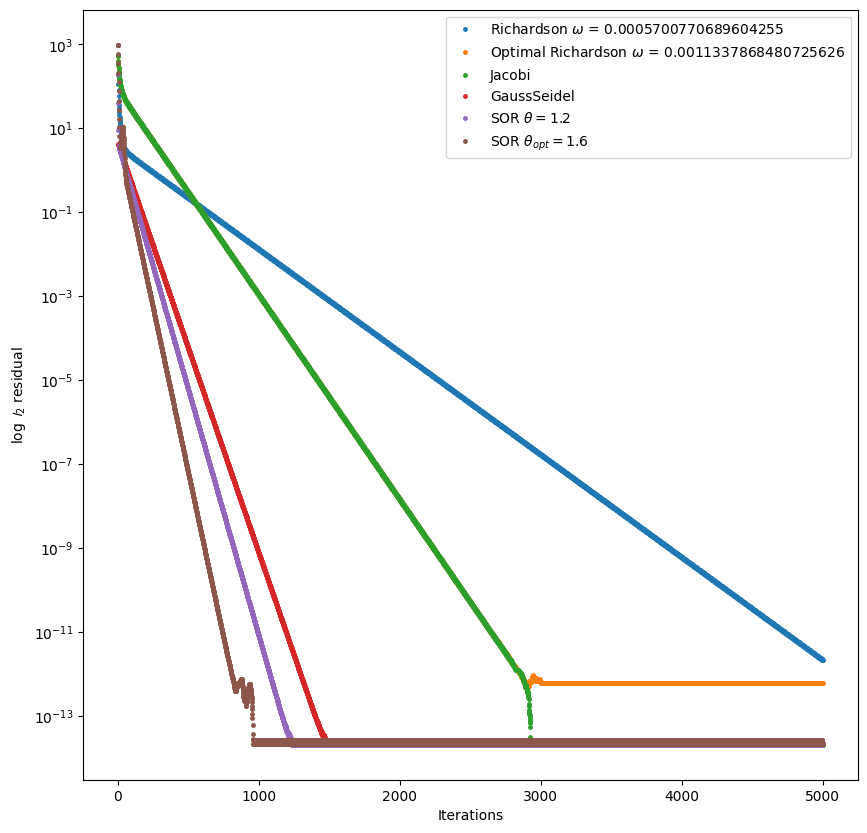

In [9]:
n = 20
A = genTriDiagonalmatrix(n)
x0= np.zeros((A.shape[0],))
x0[0] = 1.
b= np.ones((A.shape[0],))
eig_max = (2- 2*np.cos((np.pi*n)/(n+1)))*((n+1)**2)
eig_min = (2- 2*np.cos((np.pi)/(n+1)))*((n+1)**2)
x=0
theta= 1.2
theta_opt = 1.6
omega = 1./eig_max
# for i in range(n):
plt.figure(figsize=(10,10))
x,errors= RichardsonIteration(A,b,x0, omega,1e-14,5000) 
plt.semilogy(errors, marker='o',markersize=2.5,linestyle='None',label=f'Richardson $\omega$ = {1./eig_max}')
x,errors= OptimalRichardsonIteration(A,b,x0,1e-14,5000, eig_max=eig_max,eig_min=eig_min) 
plt.semilogy(errors, marker='o',markersize=2.5,linestyle='None',label=f'Optimal Richardson $\omega$ = {2./(eig_max+eig_min)}')
x,errors= JacobiIteration(A,b,x0,1e-14,5000 ) 
plt.semilogy(errors, marker='o',markersize=2.5,linestyle='None',label=f'Jacobi')
x,errors= GaussSeidelIteration(A,b,x0,1e-14,5000 ) 
plt.semilogy(errors, marker='o',markersize=2.5,linestyle='None',label=f'GaussSeidel')
x,errors= SORIteration(A,b,x0,theta,1e-14,5000 ) 
plt.semilogy(errors, marker='o',markersize=2.5,linestyle='None',label=f'SOR $\\theta={theta}$')
x,errors= SORIteration(A,b,x0,theta_opt,1e-14,5000 ) 
plt.semilogy(errors, marker='o',markersize=2.5,linestyle='None',label=f'SOR $\\theta_{{opt}}={theta_opt}$')
plt.ylabel("$\log$ $\mathcal{l}_2$ residual")
plt.xlabel("Iterations")
plt.legend()
plt.show()

##### Ranks

1. Optimal SOR
1. SOR
1. Gauss Seidel
1. Jacobi 
1. Optimal Richardson
1. Richardson

Note: All of them failed to reach the tolerance of $10^{-14}$, so I rated their performance based on tolerance $10^{-13}$

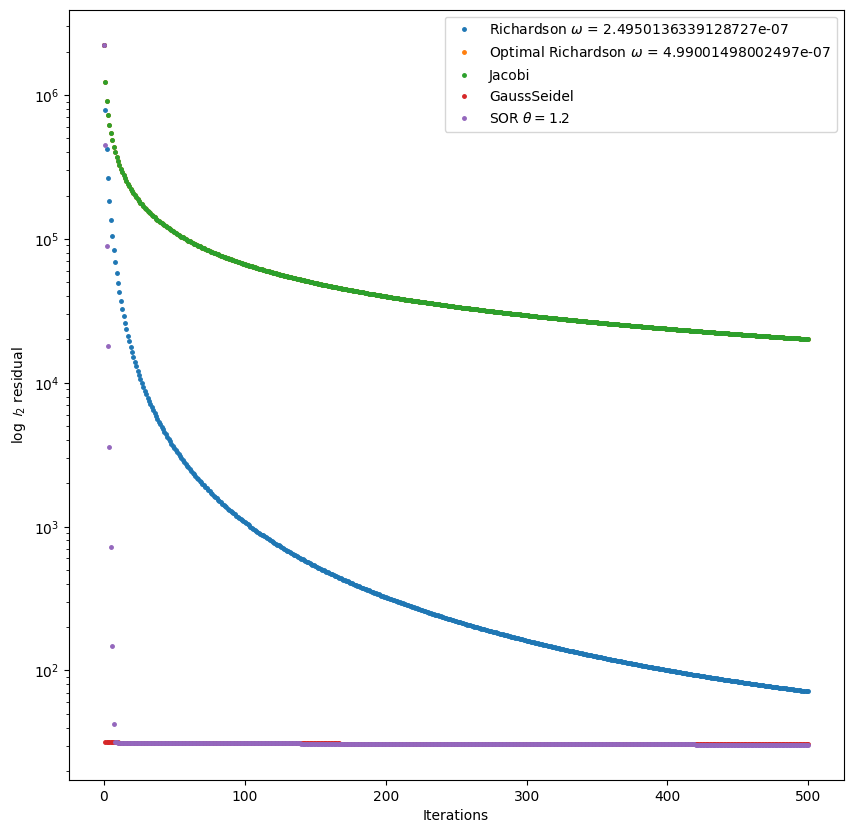

In [16]:
n = 1000
A = genTriDiagonalmatrix(n)
x0= np.zeros((A.shape[0],))
x0[0] = 1.
b= np.ones((A.shape[0],))
eig_max = (2- 2*np.cos((np.pi*n)/(n+1)))*((n+1)**2)
eig_min = (2- 2*np.cos((np.pi)/(n+1)))*((n+1)**2)
x=0
theta= 1.2
theta_opt = 1.6
omega = 1./eig_max
# for i in range(n):
plt.figure(figsize=(10,10))
x,errors= RichardsonIteration(A,b,x0, omega,1e-14,500) 
plt.semilogy(errors, marker='o',markersize=2.5,linestyle='None',label=f'Richardson $\omega$ = {1./eig_max}')
x,errors= OptimalRichardsonIteration(A,b,x0,1e-14,500, eig_max=eig_max,eig_min=eig_min) 
plt.semilogy(errors, marker='o',markersize=2.5,linestyle='None',label=f'Optimal Richardson $\omega$ = {2./(eig_max+eig_min)}')
x,errors= JacobiIteration(A,b,x0,1e-14,500 ) 
plt.semilogy(errors, marker='o',markersize=2.5,linestyle='None',label=f'Jacobi')
x,errors= GaussSeidelIteration(A,b,x0,1e-14,500 ) 
plt.semilogy(errors, marker='o',markersize=2.5,linestyle='None',label=f'GaussSeidel')
x,errors= SORIteration(A,b,x0,theta,1e-14,500 ) 
plt.semilogy(errors, marker='o',markersize=2.5,linestyle='None',label=f'SOR $\\theta={theta}$')
# x,errors= SORIteration(A,b,x0,theta_opt,1e-14,500 ) 
# plt.semilogy(errors, marker='o',markersize=2.5,linestyle='None',label=f'SOR $\\theta_{{opt}}={theta_opt}$')
plt.ylabel("$\log$ $\mathcal{l}_2$ residual")
plt.xlabel("Iterations")
plt.legend()
plt.show()

When $n=1000$ the algorithms take significantly longer to run and converge. As discussed in class, the rate at which the iterations converge is less than the spectral radius of the matrix, and the spectral radius is directly proportional to condition number, so as $\rho(M^{-1}N) \to 1$ the slow ther convergence and higher the condition number.

### Quesiton 4 (d) 

### Steepest Descent

In [11]:
def SteepestDescent(A, b, x0, tol, maxIter):
    x = x0
    r = b - A@x
    i=0
    errors= [np.linalg.norm(r)]
    while np.linalg.norm(r) > tol and i < maxIter:
        l = (r@r)/(r@A@r)
        x = x + l * r
        r = b - A@x
        errors.append(np.linalg.norm(r)) 
        i+=1
    return x, errors


### Conjugate Gradient

In [12]:
def CG(A, b, x0, tol, maxIter):
    x = x0
    r = b - A@x
    i=0
    errors= [np.linalg.norm(r)]
    s = r
    while np.linalg.norm(r) > tol and i < maxIter:
        t = A@s
        l = (r@r)/(s@t)
        x = x + l * r
        rNew = r - l * t
        s = rNew + ((rNew@rNew)/(r@r)) * s
        r = rNew
        errors.append(np.linalg.norm(r)) 
        i+=1
    return x, errors

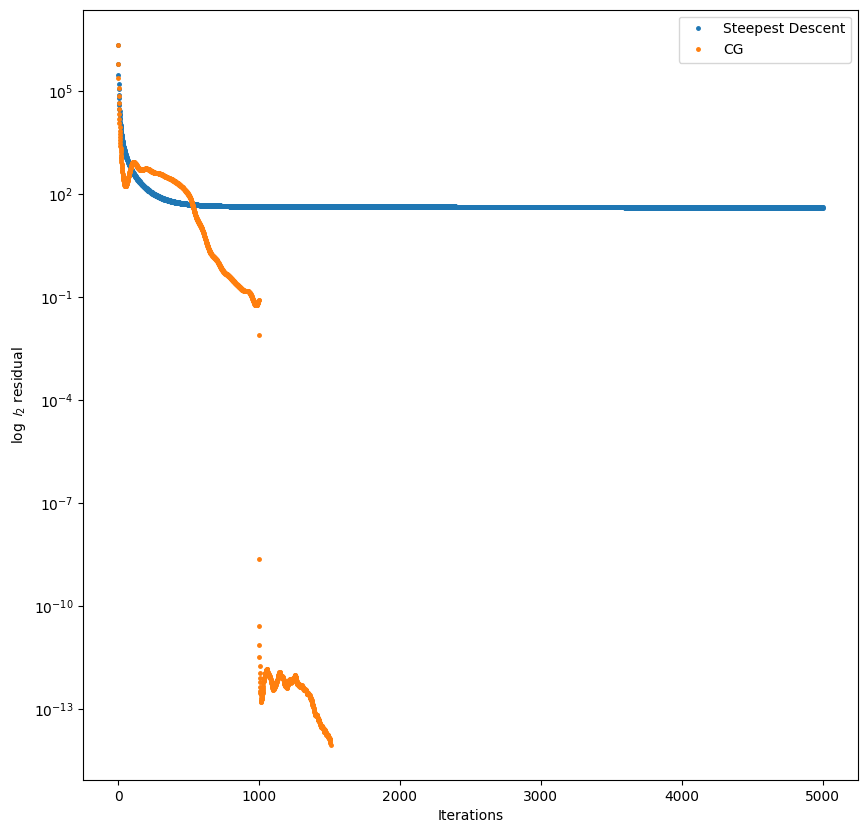

In [17]:
n = 1000
A = genTriDiagonalmatrix(n)
x0= np.zeros((A.shape[0],))
x0[0] = 1.
b= np.ones((A.shape[0],))
plt.figure(figsize=(10,10))
x,errors= SteepestDescent(A,b,x0,1e-14,5000 ) 
plt.semilogy(errors, marker='o',markersize=2.5,linestyle='None',label=f'Steepest Descent')
x,errors= CG(A,b,x0,1e-14,5000 ) 
plt.semilogy(errors, marker='o',markersize=2.5, linestyle='None',label=f'CG')
plt.ylabel("$\log$ $\mathcal{l}_2$ residual")
plt.xlabel("Iterations")
plt.legend()
plt.show()

##### Ranks
1. CG (Converged with 1313 iterations)
2. Steepest Descent (Didn't Converge)